# 🧠📊🧪 Estadística inferencial: Pruebas de hipótesis

## Configuración

In [125]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind,  norm
import numpy as np
import pandas as pd
import seaborn as sns

In [117]:
sns.set_style("whitegrid")

In [126]:
def plot_two_tail_test(mu=0, sigma=1, alpha=0.05):
    """
    Grafica una prueba de hipótesis de dos colas para una distribución normal.
    
    Parámetros:
    - mu: media de la distribución bajo H₀
    - sigma: desviación estándar
    - alpha: nivel de significancia total (área de las dos colas)
    """
    # Valores críticos para los extremos
    z_critico = norm.ppf(1 - alpha/2)
    
    # Rango de valores x para graficar
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    # Gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Distribución bajo H₀', color='blue')

    # Sombrar colas
    x_izq = np.linspace(mu - 4*sigma, mu - z_critico*sigma, 100)
    x_der = np.linspace(mu + z_critico*sigma, mu + 4*sigma, 100)

    plt.fill_between(x_izq, norm.pdf(x_izq, mu, sigma), color='red', alpha=0.4, label='α/2')
    plt.fill_between(x_der, norm.pdf(x_der, mu, sigma), color='red', alpha=0.4)

    # Líneas punteadas en los valores críticos
    plt.axvline(mu - z_critico*sigma, color='red', linestyle='--', label='Z críticos')
    plt.axvline(mu + z_critico*sigma, color='red', linestyle='--')

    # Anotaciones y formato
    plt.title(f'Prueba de Dos Colas (α = {alpha})')
    plt.xlabel('Valor')
    plt.ylabel('Densidad de probabilidad')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_one_tail_test(mu=0, sigma=1, alpha=0.05, tail='right'):
    """
    Grafica una prueba de hipótesis de una cola (derecha o izquierda) para una distribución normal.
    
    Parámetros:
    - mu: media bajo H₀
    - sigma: desviación estándar
    - alpha: nivel de significancia
    - tail: 'right' para cola superior (mayor que), 'left' para cola inferior (menor que)
    """
    # Valor crítico z
    if tail == 'right':
        z_critico = norm.ppf(1 - alpha)
    elif tail == 'left':
        z_critico = norm.ppf(alpha)
    else:
        raise ValueError("El parámetro 'tail' debe ser 'right' o 'left'.")

    # Rango de valores para x
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = norm.pdf(x, mu, sigma)

    # Graficar distribución
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Distribución bajo H₀', color='blue')

    # Sombrar la cola correspondiente
    if tail == 'right':
        x_col = np.linspace(mu + z_critico*sigma, mu + 4*sigma, 100)
        plt.fill_between(x_col, norm.pdf(x_col, mu, sigma), color='red', alpha=0.4, label='α')
        plt.axvline(mu + z_critico*sigma, color='red', linestyle='--', label='Z crítico')
    else:  # tail == 'left'
        x_col = np.linspace(mu - 4*sigma, mu + z_critico*sigma, 100)
        plt.fill_between(x_col, norm.pdf(x_col, mu, sigma), where=(x_col < mu + z_critico*sigma),
                         color='red', alpha=0.4, label='α')
        plt.axvline(mu + z_critico*sigma, color='red', linestyle='--', label='Z crítico')

    # Texto y formato
    cola_txt = 'derecha' if tail == 'right' else 'izquierda'
    plt.title(f'Prueba de Una Cola ({cola_txt}, α = {alpha})')
    plt.xlabel('Valor')
    plt.ylabel('Densidad de probabilidad')
    plt.legend()
    plt.grid(True)
    plt.show()



En estadística, el **parámetro poblacional** más común es la media ($\mu$), que representa el valor promedio de toda una población. Sin embargo, en la vida real casi nunca podemos conocer el valor exacto de $\mu$ porque sería necesario medir a **todos** los individuos, lo cual suele ser costoso o imposible 🕵️‍♂️🔍. Por eso, tomamos una **muestra** y calculamos la media muestral ($\bar{x}$), que es un **estadístico**. Este valor nos sirve como una **estimación** de la media real de la población. Así, usamos lo que observamos en la muestra para hacer inferencias sobre el gran universo que no podemos ver completamente 🌎✨.


> Un **estadístico** es un valor calculado a partir de una muestra, usado para estimar parámetros de una población.



La **distribución muestral** es la distribución de un estadístico (como la media o la proporción) calculado a partir de muchas muestras tomadas de la misma población. Esta idea es fundamental porque nos permite entender cómo varía un estadístico de muestra en muestra, y así estimar la incertidumbre de nuestras mediciones. Gracias a la distribución muestral, podemos hacer **inferencias** sobre los parámetros poblacionales, es decir, sacar conclusiones sobre toda la población a partir de los resultados obtenidos en una muestra. Esto es la base de la estadística inferencial y de las pruebas de hipótesis.

In [68]:
PATH="https://raw.githubusercontent.com/zyntonyson/bootcamp_ds_da/refs/heads/main/datasets/weight-height.csv"
weight_height=pd.read_csv(PATH)

weight_height=weight_height.query("Gender =='Female'")

#Valor 'Poblacional'
weight_height[['Height','Weight']].mean()


Height     63.708774
Weight    135.860093
dtype: float64

In [ ]:
# Obtener una muestra de tamaño n
def get_sample(df, n,col='Weight'):
    sample = df.sample(n=n,)[col]
    return sample.values.tolist(), float(sample.mean())


get_sample(weight_height,20)

([176.450817700996,
  143.462978461094,
  127.066942258631,
  125.929952145491,
  117.169559135498,
  138.335712739484,
  182.45116816137,
  135.013164040623,
  102.063907340682,
  151.735235300403,
  131.794463059161,
  141.914162667578,
  138.386111841329,
  143.768450582718,
  132.576418436117,
  134.13881613433,
  119.59911655057,
  138.022592491558,
  136.847598058533,
  155.720652613621],
 138.62239098598937)

¿Qué tan diferentes pueden ser los valores de la media $\bar x$ ?, ¿Cómo se distribuyen?

In [122]:
N= 10000   # Cantidad de muestras
n= 25  # Tamaño de la muestras

samples=[]
for i in range(N):
    _,mean_value=get_sample(weight_height,n)
    samples.append(mean_value)


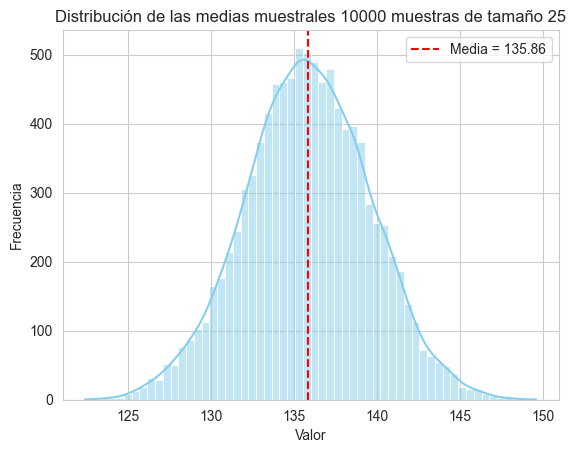

In [124]:
media = weight_height.Weight.mean()

sns.histplot(samples, kde=True, color='skyblue')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title(f'Distribución de las medias muestrales {N} muestras de tamaño {n}')
plt.axvline(media, color='red', linestyle='--', label=f'Media = {media:.2f}')
plt.legend()
plt.show()

Las **distribuciones muestrales** nos muestran cómo pueden variar los resultados de una muestra a otra 📊. Gracias a esto, podemos saber si el valor que observamos en nuestra muestra es algo común o raro dentro de todas las posibilidades. Así, cuando hacemos una **prueba de hipótesis** 🧪, usamos la distribución muestral para decidir si los datos apoyan o no una idea sobre la población. ¡Por eso, entender las distribuciones muestrales es clave para tomar decisiones confiables en estadística! ✅

## 📊 Pruebas de Hipótesis

### 🧪 ¿Qué es una prueba de hipótesis?
Es un procedimiento que usamos para tomar decisiones sobre una población, basados en una muestra. Las **pruebas de hipótesis** nos ayudan a tomar decisiones usando datos. Imagina que tienes una idea o suposición sobre una población (por ejemplo, que una medicina funciona mejor que otra). Con una muestra, calculas si los resultados que ves son tan extremos que sería raro que ocurrieran solo por casualidad. Si es así, tienes motivos para dudar de tu suposición inicial y considerar la alternativa. Así, las pruebas de hipótesis son como un filtro que nos dice cuándo los datos son lo suficientemente convincentes para cambiar de opinión. 🔍🤔

**Elementos de la prueba de hipótesis**

- **Hipótesis:** Son las afirmaciones que queremos poner a prueba. La hipótesis nula (H₀) suele indicar que no hay efecto o diferencia, mientras que la alternativa (H₁) plantea lo contrario.

- **Estadístico de prueba:** Es el valor calculado a partir de los datos de la muestra que nos ayuda a decidir si aceptamos o rechazamos H₀. 

- **Alfa (α):** Es el nivel de significancia, es decir, la probabilidad máxima de cometer un error al rechazar H₀ cuando en realidad es cierta. Comúnmente se usa α = 0.05.
    > El más común es **α = 0.05** (es decir, aceptamos un 5% de riesgo de equivocarnos al rechazar H₀).

- **Valor-p:** Es la probabilidad de obtener un resultado igual o más extremo que el observado, suponiendo que H₀ es cierta. Nos indica qué tan compatibles son los datos con la hipótesis nula.

- **Regla de decisión:** Es el criterio para tomar una decisión. Si el valor-p es menor que α, rechazamos H₀; si es mayor o igual, no la rechazamos.
    > - **Si p < α**, rechazamos H₀ → *hay evidencia suficiente* para preferir H₁.
    > - **Si p ≥ α**, no rechazamos H₀ → *no hay evidencia suficiente* para cambiar de idea.

**Ejemplo 1:**  

---

Queremos saber si un nuevo método de estudio mejora el puntaje promedio de los estudiantes, que históricamente es de 70 puntos.
  
  **Datos:**  
  Disponemos de una muestra de calificaciones de estudiantes que usaron el nuevo método de estudio.
  
  - **Hipótesis nula (H₀):** El promedio con el nuevo método es igual o menor a 70 ($\mu \leq 70$).
  - **Hipótesis alternativa (H₁):** El promedio con el nuevo método es mayor a 70 ($\mu > 70$).
  
  - **Nivel de significancia ($\alpha$):** 0.05
  
  - **Regla de decisión:**  
    - Si el valor-p < 0.05, rechazamos H₀ (hay evidencia de que el método mejora el promedio).
    - Si el valor-p ≥ 0.05, no rechazamos H₀ (no hay evidencia suficiente para afirmar que mejora).

**Ejemplo 2:**  

---

Una empresa de videojuegos quiere saber si dos versiones de un juego generan diferentes niveles de satisfacción en los usuarios.

**Datos:**  
Se recolectan las calificaciones de satisfacción (de 1 a 10) de dos grupos de jugadores: uno que jugó la versión A y otro la versión B.

- **Hipótesis nula (H₀):** No hay diferencia en la satisfacción promedio entre las dos versiones ($\mu_A = \mu_B$).
- **Hipótesis alternativa (H₁):** Hay una diferencia en la satisfacción promedio entre las dos versiones ($\mu_A \neq \mu_B$).

- **Nivel de significancia ($\alpha$):** 0.05

- **Regla de decisión:**  
  - Si el valor-p < 0.05, rechazamos H₀ (hay evidencia de que las versiones generan distinta satisfacción).
  - Si el valor-p ≥ 0.05, no rechazamos H₀ (no hay evidencia suficiente para afirmar que hay diferencia).

---

### 🔄 Pruebas de dos colas (Diferencia)

Un nuevo medicamento podría afectar la presión arterial. ¿Aumenta o disminuye? No lo sabemos, solo queremos saber si cambia respecto al valor habitual.

**Datos:**  
Se mide la presión arterial de un grupo de pacientes después de tomar el medicamento y se compara con el valor promedio histórico de 120.

**Hipótesis:**
- **H₀:** μ = 120  (el medicamento no cambia la presión arterial)
- **H₁:** μ ≠ 120  (el medicamento cambia la presión arterial, ya sea aumentándola o disminuyéndola)

**Nivel de significancia ($\alpha$):** 0.05

**Regla de decisión:**  
- Si el valor-p < 0.05, rechazamos H₀ (hay evidencia de que el medicamento cambia la presión arterial).
- Si el valor-p ≥ 0.05, no rechazamos H₀ (no hay evidencia suficiente para afirmar que hay un cambio).

c:\Users\roman\Documents\proyectos\tripleten\bootcamp_ds_da\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


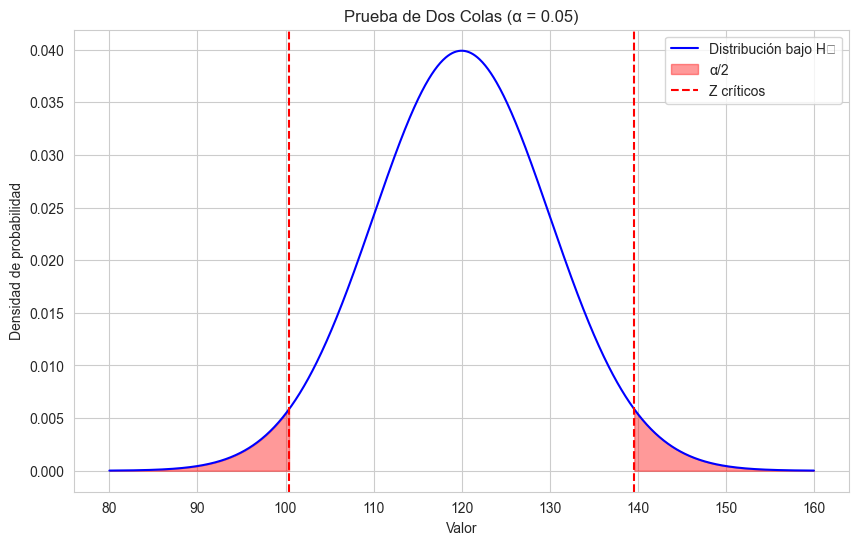

In [127]:
plot_two_tail_test(120,10,0.05)

---

### ➡️ Pruebas de una cola (Mayor que o menor que)

Supongamos que una escuela implementa un nuevo curso de matemáticas y quiere saber si este curso realmente ayuda a los estudiantes a obtener **mayores calificaciones** que el promedio histórico, que es de 70 puntos. Para ello, se toma una muestra de calificaciones de estudiantes que participaron en el curso nuevo y se compara con el promedio anterior.

**Ejemplo:**
> ¿Los estudiantes de un curso nuevo obtienen **mayores calificaciones** que el promedio histórico?

**Datos:**  
Se toma una muestra de calificaciones de estudiantes que participaron en el curso nuevo y se compara con el promedio histórico de 70.

**Hipótesis:**
- **H₀:** μ ≤ 70  (el curso no mejora las calificaciones o incluso las empeora)
- **H₁:** μ > 70  (el curso mejora las calificaciones)

**Nivel de significancia ($\alpha$):** 0.05

**Regla de decisión:**  
- Si el valor-p < 0.05, rechazamos H₀ (hay evidencia de que el curso mejora las calificaciones).
- Si el valor-p ≥ 0.05, no rechazamos H₀ (no hay evidencia suficiente para afirmar que mejora).

c:\Users\roman\Documents\proyectos\tripleten\bootcamp_ds_da\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


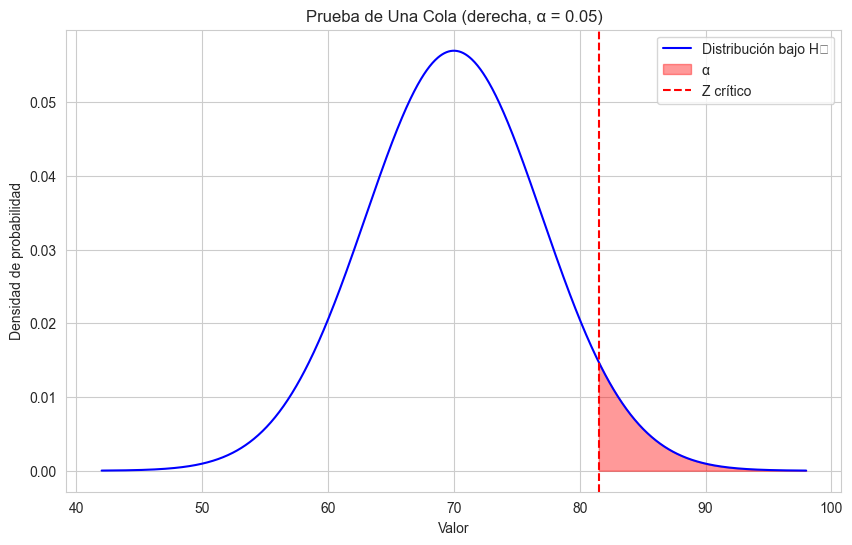

In [128]:
plot_one_tail_test(70,7,0.05,'right')


---

Supón que un grupo de biólogos marinos está monitoreando la población de una especie de pez en una reserva natural. El promedio histórico de peces por kilómetro cuadrado es de 189. Tras implementar nuevas medidas de conservación, quieren saber si la densidad poblacional ha **disminuido** (por ejemplo, debido a factores ambientales adversos).

**Ejemplo:**
> ¿La densidad actual de la especie marina es **menor** que el promedio histórico?

**Datos:**  
Se toma una muestra de densidades (peces/km²) en diferentes zonas de la reserva y se compara con el promedio histórico de 189.

**Hipótesis:**
- **H₀:** μ ≥ 189  (la densidad no ha disminuido o incluso ha aumentado)
- **H₁:** μ < 189  (la densidad ha disminuido)

**Nivel de significancia ($\alpha$):** 0.05

**Regla de decisión:**  
- Si el valor-p < 0.05, rechazamos H₀ (hay evidencia de que la densidad ha disminuido).
- Si el valor-p ≥ 0.05, no rechazamos H₀ (no hay evidencia suficiente para afirmar que disminuyó).

c:\Users\roman\Documents\proyectos\tripleten\bootcamp_ds_da\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


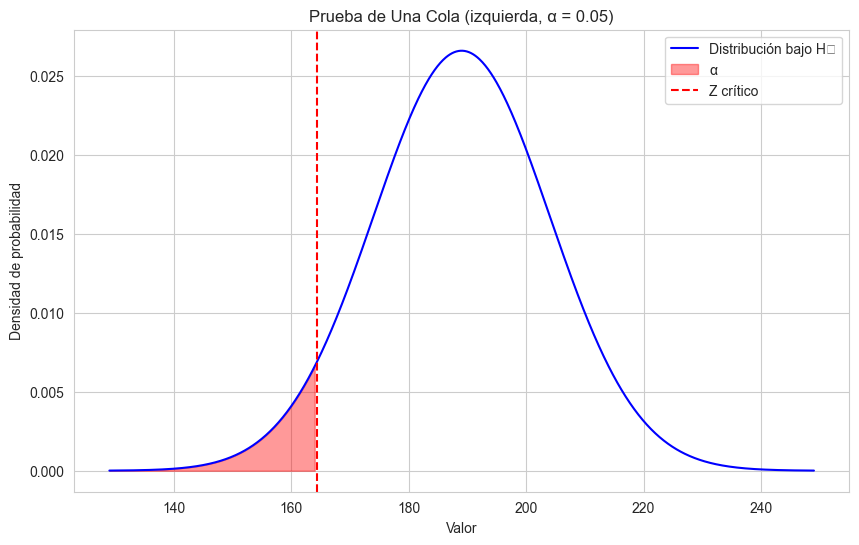

In [129]:
plot_one_tail_test(189,15,0.05,'left')

---

## Ejemplos resueltos

### Prueba de hipótesis para una muestra

---


Un grupo de biólogos marinos está monitoreando la población de una especie de tortuga en una reserva natural. El promedio histórico de tortugas por kilómetro cuadrado es de 50. Tras un evento ambiental importante, quieren saber si la densidad actual de tortugas **es diferente** al valor histórico, es decir, si ha cambiado (puede ser mayor o menor). Se realiza un conteo de especies en una muestra de seccione.

**Hipótesis:**
- **H₀:** μ = 50  (la densidad de tortugas no ha cambiado respecto al promedio histórico)
- **H₁:** μ ≠ 50  (la densidad de tortugas es diferente al promedio histórico)

**Nivel de significancia ($\alpha$):** 0.05

In [146]:
abundacia = [50, 47, 51, 56, 47, 47, 56, 52, 46, 51, 46, 46, 49, 38, 39, 45, 43, 50, 43, 41, 55, 47, 48, 41, 45]
mu=np.array(abundacia).mean()
std = np.array(abundacia).std()

stat, p = ttest_1samp(abundacia, 50)

print(f"Estadístico t: {stat:.2f}")
print(f"Valor p: {p:.4f}")

Estadístico t: -2.93
Valor p: 0.0074


c:\Users\roman\Documents\proyectos\tripleten\bootcamp_ds_da\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


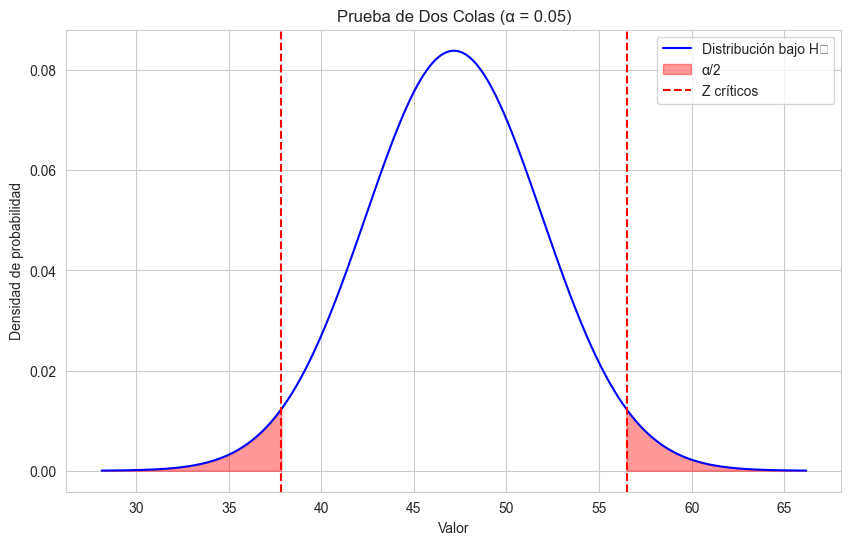

In [147]:
plot_two_tail_test(mu,std,0.05)

Ahora supongamos que queremos probar con el mismo $\alpha$ que la población a disminuido

- **H₀ (nula):** μ ≥ 50  (la densidad de tortugas no ha disminuido o incluso ha aumentado)
- **H₁ (alternativa):** μ < 50  (la densidad de tortugas ha disminuido)

In [ ]:
stat, p = ttest_1samp(abundacia, 50, alternative='less')

print(f"Estadístico t: {stat:.2f}")
print(f"Valor p (una cola, μ < 50): {p:.4f}")

Estadístico t: -2.93
Valor p (una cola, μ < 50): 0.0037


In [ ]:
stat, p = ttest_1samp(abundacia, 50)

# Para una cola izquierda (μ < 50), divide el valor p entre 2 y revisa que el estadístico t sea negativo
if stat < 0:
    p_one_tail = p / 2
else:
    p_one_tail = 1 - (p / 2)

print(f"Estadístico t: {stat:.2f}")
print(f"Valor p (una cola, μ < 50): {p_one_tail:.4f}")

Estadístico t: -2.93
Valor p (una cola, μ < 50): 0.0037


c:\Users\roman\Documents\proyectos\tripleten\bootcamp_ds_da\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


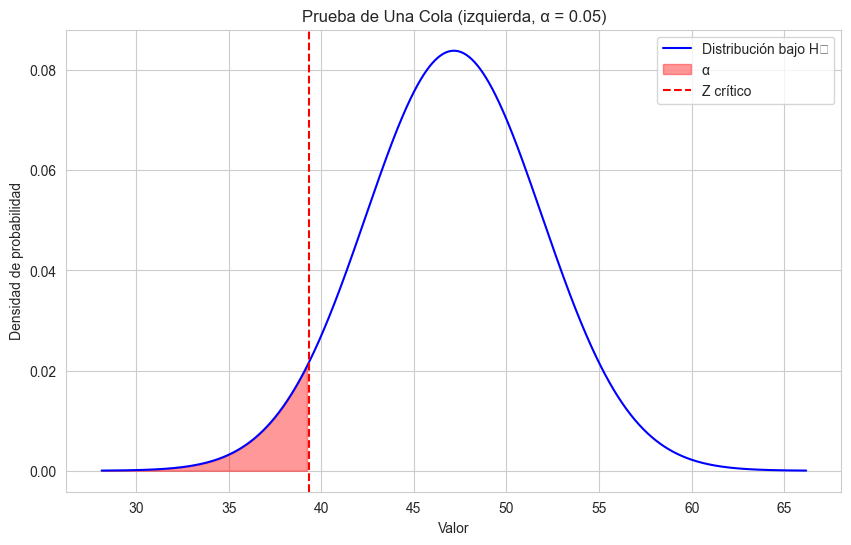

In [148]:
plot_one_tail_test(mu,std,0.05,'left')

### 📊 Comparar medias de dos poblaciones (independientes)


---

Una empresa manufacturera quiere optimizar la calidad de su línea de producción. Actualmente trabaja con dos proveedores diferentes de materia prima (Proveedor A y Proveedor B) y desea saber si existe una diferencia significativa en el peso promedio de las piezas producidas con insumos de cada proveedor. Para ello, toma una muestra aleatoria de piezas fabricadas con materia prima de cada proveedor y compara sus medias.

**Hipótesis:**
- **H₀ (nula):** μ₁ = μ₂  (el peso promedio de las piezas es igual para ambos proveedores)
- **H₁ (alternativa):** μ₁ ≠ μ₂  (el peso promedio de las piezas es diferente entre los proveedores)

**Nivel de significancia ($\alpha$):** 0.01

**Regla de decisión:**  
- Si el valor-p < 0.01, rechazamos H₀ (hay evidencia de que los proveedores producen piezas con diferente peso promedio).
- Si el valor-p ≥ 0.01, no rechazamos H₀ (no hay evidencia suficiente para afirmar que hay diferencia).

In [153]:
proveedor_a =[57.49, 64.58, 61.64, 57.35, 62.57, 60.49, 64.84, 56.49, 58.36, 58.04, 52.68, 61.48, 61.31, 60.03, 58.83, 52.92, 57.9, 58.29]
proveedor_b =[55.99, 59.19, 62.02, 69.43, 60.87, 61.29, 59.63, 50.41, 59.87, 60.3, 72.32, 59.04, 61.51, 59.83, 54.16]


alfa= 0.05
stat, p = ttest_ind(proveedor_a, proveedor_b)

print(f"Estadístico t: {stat:.2f}")
print(f"Valor p: {p:.4f}")

Estadístico t: -0.80
Valor p: 0.4311


In [154]:
stat, p = ttest_ind(proveedor_a, proveedor_b,equal_var=False)

print(f"Estadístico t: {stat:.2f}")
print(f"Valor p: {p:.4f}")

Estadístico t: -0.77
Valor p: 0.4514


---

Un equipo de nutriólogos está evaluando dos planes alimenticios diferentes para deportistas. El objetivo es saber si el **Plan A** genera un mayor consumo calórico promedio diario que el **Plan B**. Para ello, se selecciona una muestra aleatoria de deportistas que siguen cada plan y se registra su consumo calórico diario.

**Hipótesis:**
- **H₀ (nula):** μ₁ ≤ μ₂  (el consumo calórico promedio con el Plan A es igual o menor que con el Plan B)
- **H₁ (alternativa):** μ₁ > μ₂  (el consumo calórico promedio con el Plan A es mayor que con el Plan B)

**Nivel de significancia ($\alpha$):** 0.01

**Regla de decisión:**  
- Si el valor-p < 0.01, rechazamos H₀ (hay evidencia de que el Plan A genera mayor consumo calórico promedio).
- Si el valor-p ≥ 0.01, no rechazamos H₀ (no hay evidencia suficiente para afirmar que el Plan A es superior).

In [158]:
plan_a =[3089, 3126, 3153, 3080, 3125, 3126, 3140, 3089, 3087, 3133, 3127, 3126, 3129, 3103, 3126, 3127, 3102, 3167, 3132, 3090, 3136]
plan_b =[3185, 3212, 3217, 3188, 3214, 3206, 3212, 3228, 3196, 3189, 3187, 3188, 3199, 3205, 3204, 3212, 3200, 3222, 3196, 3241, 3209, 3187, 3184, 3207, 3197]

stat, p = ttest_ind(plan_a, plan_b,equal_var=False)

print(f"Estadístico t: {stat:.2f}")
print(f"Valor p: {p:.4f}")



Estadístico t: -14.36
Valor p: 0.0000


### 🔁 Muestras emparejadas (antes y después)

---


Un equipo de psicólogos desea evaluar si un taller de desarrollo personal tiene efecto en los puntajes de un test de personalidad. Para ello, aplican el test a un grupo de participantes **antes** y **después** de asistir al taller. Se quiere saber si, en promedio, los puntajes **cambian** tras la intervención.

**Hipótesis:**
- **H₀ (nula):** μ_d = 0  (no hay diferencia en el puntaje promedio antes y después del taller)
- **H₁ (alternativa):** μ_d ≠ 0  (hay diferencia en el puntaje promedio antes y después del taller)

donde μ_d es la media de las diferencias (después - antes).

**Nivel de significancia ($\alpha$):** 0.10

**Regla de decisión:**  
- Si el valor-p < 0.10, rechazamos H₀ (hay evidencia de que el taller afecta los puntajes).
- Si el valor-p ≥ 0.10, no rechazamos H₀ (no hay evidencia suficiente para afirmar que hay un cambio).

In [ ]:

previo_taller=[106.4, 104.3, 99.3, 92.4, 86.4, 96.0, 107.7, 101.9, 88.8, 101.6, 103.5, 92.0, 101.4, 100.5, 89.7, 103.2, 105.0, 109.7, 109.5, 87.6]
post_taller =[91.6, 104.6, 104.6, 104.6, 134.7, 105.1, 110.2, 108.6, 105.9, 97.2, 106.8, 93.0, 97.9, 95.6, 100.7, 120.8, 83.2, 106.2, 85.5, 95.8]

stat,p= ttest_rel(previo_taller,post_taller)
print(f"Estadístico t: {stat:.2f}")
print(f"Valor p: {p:.4f}")

Estadístico t: -0.95
Valor p: 0.3553


---

Un grupo de investigadores quiere evaluar si un nuevo método de afinación reduce la desviación en la frecuencia de instrumentos musicales. Para ello, miden la desviación de la frecuencia (en Hz) de cada instrumento **antes** y **después** de aplicar el nuevo método de afinación. Se busca determinar si, en promedio, la desviación **disminuye** tras la intervención.

**Hipótesis:**
- **H₀ (nula):** μ_d ≥ 0  (la desviación promedio después de la afinación es igual o mayor que antes)
- **H₁ (alternativa):** μ_d < 0  (la desviación promedio después de la afinación es menor que antes)

donde μ_d es la media de las diferencias (después - antes).

**Nivel de significancia ($\alpha$):** 0.05

**Regla de decisión:**  
- Si el valor-p < 0.05, rechazamos H₀ (hay evidencia de que el método de afinación reduce la desviación).
- Si el valor-p ≥ 0.05, no rechazamos H₀ (no hay evidencia suficiente para afirmar que la desviación disminuye).

In [200]:
previo =[364.2, 327.3, 286.2, 299.2, 349.5, 298.7, 332.8, 326.6, 301.5, 402.2, 347.8, 252.1, 331.7, 301.2, 355.7, 296.5, 320.9, 343.2, 356.2, 281.8]
post = [313.0, 307.9, 301.5, 388.6, 339.6, 279.6, 358.0, 401.4, 362.2, 270.3, 307.6, 370.6, 299.5, 341.0, 352.9, 291.6, 322.9, 208.3, 288.1, 315.9]

stat,p= ttest_rel(post,previo, alternative='less')
print(f"Estadístico t: {stat:.2f}")
print(f"Valor p: {p:.4f}")

Estadístico t: -0.19
Valor p: 0.4266


---

Un grupo de analistas políticos quiere saber si, después de una campaña de comunicación, la opinión favorable promedio sobre un político ha **aumentado** respecto al valor registrado antes de la campaña. Para ello, se encuesta a un grupo de personas **antes** y **después** de la campaña, usando la misma escala de opinión .

**Hipótesis:**
- **H₀ (nula):** μ_d ≤ 0  (la opinión favorable promedio después de la campaña es igual o menor que antes)
- **H₁ (alternativa):** μ_d > 0  (la opinión favorable promedio después de la campaña es mayor que antes)

donde μ_d es la media de las diferencias (después - antes).

**Nivel de significancia ($\alpha$):** 0.05

**Regla de decisión:**  
- Si el valor-p < 0.05, rechazamos H₀ (hay evidencia de que la campaña mejoró la opinión sobre el político).
- Si el valor-p ≥ 0.05, no rechazamos H₀ (no hay evidencia suficiente para afirmar que la opinión mejoró).

In [ ]:
previo =[42.7, 43.5, 41.5, 42.6, 42.1, 43.5, 41.4, 41.4, 41.6, 40.5, 41.6, 41.5]
post = [42.2, 42.5, 42.1, 44.3, 42.9, 42.4, 43.0, 42.8, 42.7, 43.3, 43.4, 42.5]


stat, p= ttest_rel(post,previo, alternative='greater')
print(f"Estadístico t: {stat:.2f}")
print(f"Valor p: {p:.4f}")

Estadístico t: 2.48
Valor p: 0.0153


In [198]:
print(np.random.normal(loc=42.9, scale=0.7, size=12).round(1).tolist())

[42.2, 42.5, 42.1, 44.3, 42.9, 42.4, 43.0, 42.8, 42.7, 43.3, 43.4, 42.5]
